In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, \
    MaxPool2D, BatchNormalization, MaxPooling2D, \
    Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [60]:
import numpy as np
from matplotlib import pyplot as plt

In [161]:
val1 = np.arange(25).reshape(5, 5)
val2 = np.array([np.sin(i) for i in np.arange(25)]).reshape(5, 5)

In [174]:
a = np.array([[1, 2, 1],[1, 1, 0], [0, 1, 1]])
b = np.array([[1, 0, 1],[1, 0, 4], [1, 0, 1]])

In [175]:
a*b

array([[1, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [172]:
xtrain = [[[ 1,  0,  9],
       [ 1, 24, 16],
       [ 1,  7,  1]], [[ 1,  0,  1],
       [ 1,  1, 16],
       [ 1,  7,  1]], [[1, 0, 1],
       [1, 0, 0],
       [0, 0, 1]]]

In [173]:
ytrain = [[[[1, 2, 3],[1, 2, 4], [1, 1, 1]], [[1, 0, 3],[1, 12, 4], [1, 7, 1]]],
         [[[1, 2, 1],[1, 1, 4], [1, 1, 1]], [[1, 0, 1],[1, 1, 4], [1, 7, 1]]],
         [[[1, 2, 1],[1, 1, 0], [0, 1, 1]], [[1, 0, 1],[1, 0, 4], [1, 0, 1]]]]

In [177]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

xtrain.shape, ytrain.shape

((3, 3, 3), (3, 2, 3, 3))

In [179]:
xtrain[0].shape, ytrain[0].shape

((3, 3), (2, 3, 3))

In [224]:
k = ytrain[0].reshape(3, 3, 2)
k

array([[[ 1,  2],
        [ 3,  1],
        [ 2,  4]],

       [[ 1,  1],
        [ 1,  1],
        [ 0,  3]],

       [[ 1, 12],
        [ 4,  1],
        [ 7,  1]]])

In [156]:
xtrain.shape, ytrain.shape

((5, 5), (5, 5))

In [230]:
inp = Input(shape=(3, 3, 1))
out_dim = (2, 3, 3)

x = Conv2D(2, 1, activation='relu', name='Input', input_shape=(3, 3))(inp)
print(x.shape)
x = Conv2D(2, 1, activation='relu', name='Middle')(x)
print(x.shape)
out = Conv2D(2, 1, activation='relu', name='Output')(x)
print(out.shape)


func = Model(inputs=inp, outputs=out)
#func.compile(loss='MeanSquaredError', optimizer='adam', metrics='accuracy')

(None, 3, 3, 2)
(None, 3, 3, 2)
(None, 3, 3, 2)


In [235]:
class CustomAccuracy(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, y_true, y_pred):
        
        print(y_true, y_pred)
        print(y_true)
        
        mse = tf.reduce_mean(tf.square(y_pred-y_true))
        rmse = tf.math.sqrt(mse)
        return rmse / tf.reduce_mean(tf.square(y_true)) - 1

func.compile(optimizer=Adam(learning_rate=0.001), loss=CustomAccuracy())

In [236]:
train = func.fit(xtrain, ytrain, batch_size=5, epochs=20)

Epoch 1/20
Tensor("IteratorGetNext:1", shape=(None, 2, 3, 3), dtype=int64) Tensor("model_42/Output/Relu:0", shape=(None, 3, 3, 2), dtype=float32)
Tensor("IteratorGetNext:1", shape=(None, 2, 3, 3), dtype=int64)


TypeError: in user code:

    File "/home/rajesh/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/tmp/ipykernel_126849/680581242.py", line 9, in call  *
        mse = tf.reduce_mean(tf.square(y_pred-y_true))

    TypeError: Input 'y' of 'Sub' Op has type int64 that does not match type float32 of argument 'x'.


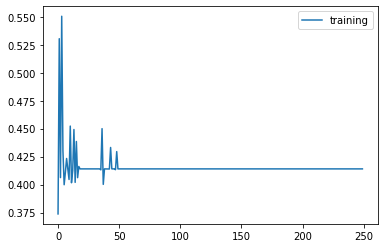

In [145]:
plt.plot(train.history['loss'])
#plt.plot(train.history['mae'])
plt.legend(['training', 'accuracy'], loc = 'upper right')
plt.show()

In [146]:
for layer in func.layers:
    weights = layer.get_weights()

In [147]:
len(weights)

2

In [148]:
output_weights = weights[1]

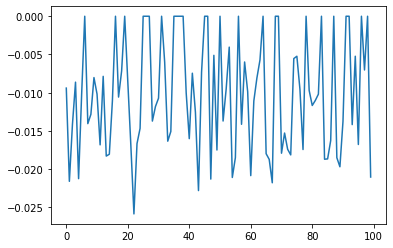

In [149]:
plt.plot(output_weights)
plt.show()

(100, 100)


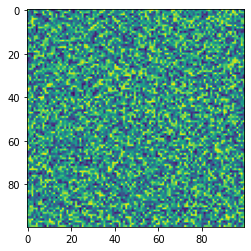

In [150]:
output_weights = weights[0]
print(output_weights.shape)
plt.imshow(output_weights)
plt.show()